Uploading file using Colab files module

#### Import all the necessary modules

In [63]:
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import silhouette_score, adjusted_rand_score
import time
import psutil
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Set the font to Times New Roman globally
plt.rc('font', family='Times New Roman')

#### Read data from ransomware dataset

In [64]:
df = pd.read_csv("Ransomware.csv", sep ="|")
df

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Name                         138047 non-null  object 
 1   md5                          138047 non-null  object 
 2   Machine                      138047 non-null  int64  
 3   SizeOfOptionalHeader         138047 non-null  int64  
 4   Characteristics              138047 non-null  int64  
 5   MajorLinkerVersion           138047 non-null  int64  
 6   MinorLinkerVersion           138047 non-null  int64  
 7   SizeOfCode                   138047 non-null  int64  
 8   SizeOfInitializedData        138047 non-null  int64  
 9   SizeOfUninitializedData      138047 non-null  int64  
 10  AddressOfEntryPoint          138047 non-null  int64  
 11  BaseOfCode                   138047 non-null  int64  
 12  BaseOfData                   138047 non-null  int64  
 13 

#### Split dataset into legitimate data and ransomware data

In [66]:
# Separate ransomware and legitimate data
ransomware = df[df['legitimate'] == 0]
legitimate = df[df['legitimate'] == 1]

In [67]:
#Number of ransomare data
ransomware

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
41323,VirusShare_4a400b747afe6547e09ce0b02dae7f1c,4a400b747afe6547e09ce0b02dae7f1c,332,224,258,11,0,354816,257024,0,...,7,3.914415,1.441688,7.677091,7298.428571,16,28438,72,0,0
41324,VirusShare_9bd57c8252948bd2fa651ad372bd4f13,9bd57c8252948bd2fa651ad372bd4f13,332,224,271,6,0,24064,164864,1024,...,6,3.199107,1.971335,5.214816,452.000000,34,958,0,15,0
41325,VirusShare_d1456165e9358b8f61f93a5f2042f39c,d1456165e9358b8f61f93a5f2042f39c,332,224,258,10,0,118784,381952,0,...,18,6.530946,2.458492,7.992688,18523.444444,48,33945,72,14,0
41326,VirusShare_e4214cc73afbba0f52bb72d5db8f8bb1,e4214cc73afbba0f52bb72d5db8f8bb1,332,224,258,10,0,174592,300032,0,...,15,5.732393,2.852364,7.987726,12706.133333,118,60500,72,14,0
41327,VirusShare_710890c07b3f93b90635f8bff6c34605,710890c07b3f93b90635f8bff6c34605,332,224,258,9,0,475648,348672,0,...,59,2.827826,0.960953,7.212329,2637.033898,20,67624,72,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [68]:
#Number of legitimate data
legitimate

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41318,mfc80.dll,1f5afd468eb5e09e9ed75a087529eab5,332,224,8450,8,0,946176,159744,0,...,123,2.607251,0.960953,5.130762,327.170732,20,1592,72,16,1
41319,mfc80u.dll,e2c48cd0132d4d1dc7d0df9a6bef686a,332,224,8450,8,0,946176,154624,0,...,123,2.607232,0.960953,5.130762,327.235772,20,1592,72,16,1
41320,mfcm80.dll,83362ee950ad18adb85b54409155c378,332,224,8450,8,0,53248,16384,0,...,1,3.524268,3.524268,3.524268,892.000000,892,892,72,16,1
41321,mfcm80u.dll,26aafee5c30020c99120ee113d751f7e,332,224,8450,8,0,52736,11264,0,...,1,3.542071,3.542071,3.542071,892.000000,892,892,72,16,1


#### Undersample ransomware data to match the size of normal samples

In [69]:
# Undersample ransomware data to match the size of legitimate data
ransomware_undersampled = resample(ransomware,
                                   replace=False,    # sample without replacement
                                   n_samples=len(legitimate),  # match number of legitimate rows
                                   random_state=42)  # for reproducibility


In [70]:
# Combine undersampled ransomware data with legitimate data
balanced_df = pd.concat([ransomware_undersampled, legitimate])

# Shuffle the data to mix ransomware and legitimate
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [71]:
balanced_df

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,VirusShare_868558943d957d340f1061b7a155beb0,868558943d957d340f1061b7a155beb0,332,224,258,10,0,118784,382464,0,...,26,6.978097,2.458492,7.988532,12840.384615,48,20394,72,14,0
1,WcsPlugInService.dll,20f7441334b18cee52027661df4a6129,34404,240,8226,9,0,30720,11264,0,...,5,3.520158,2.884317,4.851024,1057.200000,232,1692,0,16,1
2,wuapi.dll,330e69f06a428a0ab0568969532636fb,34404,240,8226,9,0,327168,367616,0,...,40,4.802285,2.865892,6.270972,5084.600000,132,81712,0,16,1
3,VirusShare_12083929580343e871d5ece5e49f6ff9,12083929580343e871d5ece5e49f6ff9,332,224,271,6,0,23552,117760,1024,...,5,3.334884,2.160964,5.257009,425.600000,20,784,0,12,0
4,taskcomp.dll,ef8808fea65723214d79734bdb79ebf6,332,224,8450,9,0,243200,60416,0,...,2,3.113164,2.657930,3.568398,580.000000,200,960,72,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82641,VirusShare_531c66ac3e29570666e07f7df4284cec,531c66ac3e29570666e07f7df4284cec,332,224,258,10,0,120320,385024,0,...,6,3.671986,2.458492,5.317552,2739.500000,48,9640,72,15,0
82642,KBDFC.DLL,853ceeeddc0cfa1ba000d29fa46e9365,332,224,8450,9,0,0,6656,0,...,1,3.577676,3.577676,3.577676,932.000000,932,932,0,16,1
82643,TSpkg.dll,91aad383cca1df75d39b88848d28ac08,34404,240,8226,9,0,61952,24064,0,...,3,6.185642,3.573823,7.491551,826.666667,776,928,0,16,1
82644,VirusShare_9c2c4a2ae763317d1e21becea0b9191e,9c2c4a2ae763317d1e21becea0b9191e,332,224,258,10,0,117248,389632,0,...,5,3.312743,2.674420,3.764385,2517.600000,48,7336,72,14,0


Check for null columns in the data


In [72]:
# Find rows with any missing values
rows_with_missing = df[df.isnull().any(axis=1)]

# Display rows with missing values
print(rows_with_missing)

Empty DataFrame
Columns: [Name, md5, Machine, SizeOfOptionalHeader, Characteristics, MajorLinkerVersion, MinorLinkerVersion, SizeOfCode, SizeOfInitializedData, SizeOfUninitializedData, AddressOfEntryPoint, BaseOfCode, BaseOfData, ImageBase, SectionAlignment, FileAlignment, MajorOperatingSystemVersion, MinorOperatingSystemVersion, MajorImageVersion, MinorImageVersion, MajorSubsystemVersion, MinorSubsystemVersion, SizeOfImage, SizeOfHeaders, CheckSum, Subsystem, DllCharacteristics, SizeOfStackReserve, SizeOfStackCommit, SizeOfHeapReserve, SizeOfHeapCommit, LoaderFlags, NumberOfRvaAndSizes, SectionsNb, SectionsMeanEntropy, SectionsMinEntropy, SectionsMaxEntropy, SectionsMeanRawsize, SectionsMinRawsize, SectionMaxRawsize, SectionsMeanVirtualsize, SectionsMinVirtualsize, SectionMaxVirtualsize, ImportsNbDLL, ImportsNb, ImportsNbOrdinal, ExportNb, ResourcesNb, ResourcesMeanEntropy, ResourcesMinEntropy, ResourcesMaxEntropy, ResourcesMeanSize, ResourcesMinSize, ResourcesMaxSize, LoadConfigurati

In [73]:
numeric_features = balanced_df.select_dtypes(include=['float64', 'int64']).columns

Performing Transformation on the data

In [74]:
def categorize_attributes(df, threshold_skewness=0.5):
    # Dictionary to store attribute categories
    attribute_groups = {
        'normalization': [],
        'standardization': [],
        'power_transformation': []
    }

    # Loop over numerical columns to assess skewness
    for col in df.select_dtypes(include=[np.number]).columns:
        skewness = df[col].skew()

        # Group columns based on skewness
        if abs(skewness) < threshold_skewness:
            attribute_groups['standardization'].append(col)
        elif skewness > threshold_skewness or skewness < -threshold_skewness:
            attribute_groups['power_transformation'].append(col)
        else:
            attribute_groups['normalization'].append(col)

    return attribute_groups


In [75]:
groups = categorize_attributes(balanced_df)

# Output grouped attributes
print("Standardization group:", groups['standardization'])
print("Power Transformation group:", groups['power_transformation'])
print("Normalization group:", groups['normalization'])

groups['standardization'].pop()

Standardization group: ['MajorSubsystemVersion', 'DllCharacteristics', 'SizeOfHeapReserve', 'SectionsMinEntropy', 'ResourcesMaxEntropy', 'legitimate']
Power Transformation group: ['Machine', 'SizeOfOptionalHeader', 'Characteristics', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData', 'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase', 'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion', 'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion', 'MinorSubsystemVersion', 'SizeOfImage', 'SizeOfHeaders', 'CheckSum', 'Subsystem', 'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb', 'SectionsMeanEntropy', 'SectionsMaxEntropy', 'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize', 'SectionsMeanVirtualsize', 'SectionsMinVirtualsize', 'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb', 'ImportsNbOrdinal', 'ExportNb', 'Res

'legitimate'

Performing Transformation and Standardization (No normalization since the normalization set of columns is empty)

In [76]:
# Initialize scalers
scaler = StandardScaler()
normalizer = MinMaxScaler()
power_transformer = PowerTransformer(method='yeo-johnson')

transformed_df = balanced_df.copy()

# Apply different scalings
transformed_df[groups['standardization']] = scaler.fit_transform(transformed_df[groups['standardization']])
transformed_df[groups['power_transformation']] = power_transformer.fit_transform(transformed_df[groups['power_transformation']])


In [77]:

transformed_df.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,VirusShare_868558943d957d340f1061b7a155beb0,868558943d957d340f1061b7a155beb0,-0.487558,-2.775558e-17,-0.894729,0.541940,-0.385949,0.258079,0.812257,-0.307674,...,1.182562,2.870069,-0.192823,1.704346,1.076381,-0.527257,0.520126,0.971825,-0.085086,0
1,WcsPlugInService.dll,20f7441334b18cee52027661df4a6129,2.051151,8.326673e-17,0.937485,0.191129,-0.385949,-0.370913,-0.909323,-0.307674,...,-0.031681,-0.352520,0.338727,-0.242545,-0.491967,0.517460,-0.641502,-1.006337,0.364544,1
2,wuapi.dll,330e69f06a428a0ab0568969532636fb,2.051151,8.326673e-17,0.937485,0.191129,-0.385949,0.846523,0.786809,-0.307674,...,1.426796,0.895758,0.314872,0.638564,0.487561,0.148302,1.169524,-1.006337,0.364544,1
3,VirusShare_12083929580343e871d5ece5e49f6ff9,12083929580343e871d5ece5e49f6ff9,-0.487558,-2.775558e-17,-0.868401,-0.962072,-0.385949,-0.476705,0.122190,3.249372,...,-0.031681,-0.539677,-0.539158,0.009378,-1.048423,-1.119224,-0.999491,-1.006337,-0.499706,0
4,taskcomp.dll,ef8808fea65723214d79734bdb79ebf6,-0.487558,-2.775558e-17,0.951505,0.191129,-0.385949,0.662464,-0.212981,-0.307674,...,-0.826127,-0.766255,0.050954,-1.038441,-0.860062,0.420891,-0.905301,0.971825,0.364544,1


Plotting heatmap for the data using Pearson, Kendall and Spearman

/Users/shashwathkumar/miniconda3/envs/ml-env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5283: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
/Users/shashwathkumar/miniconda3/envs/ml-env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5284: RuntimeWarning: invalid value encountered in sqrt
  z = con_minus_dis / np.sqrt(var)


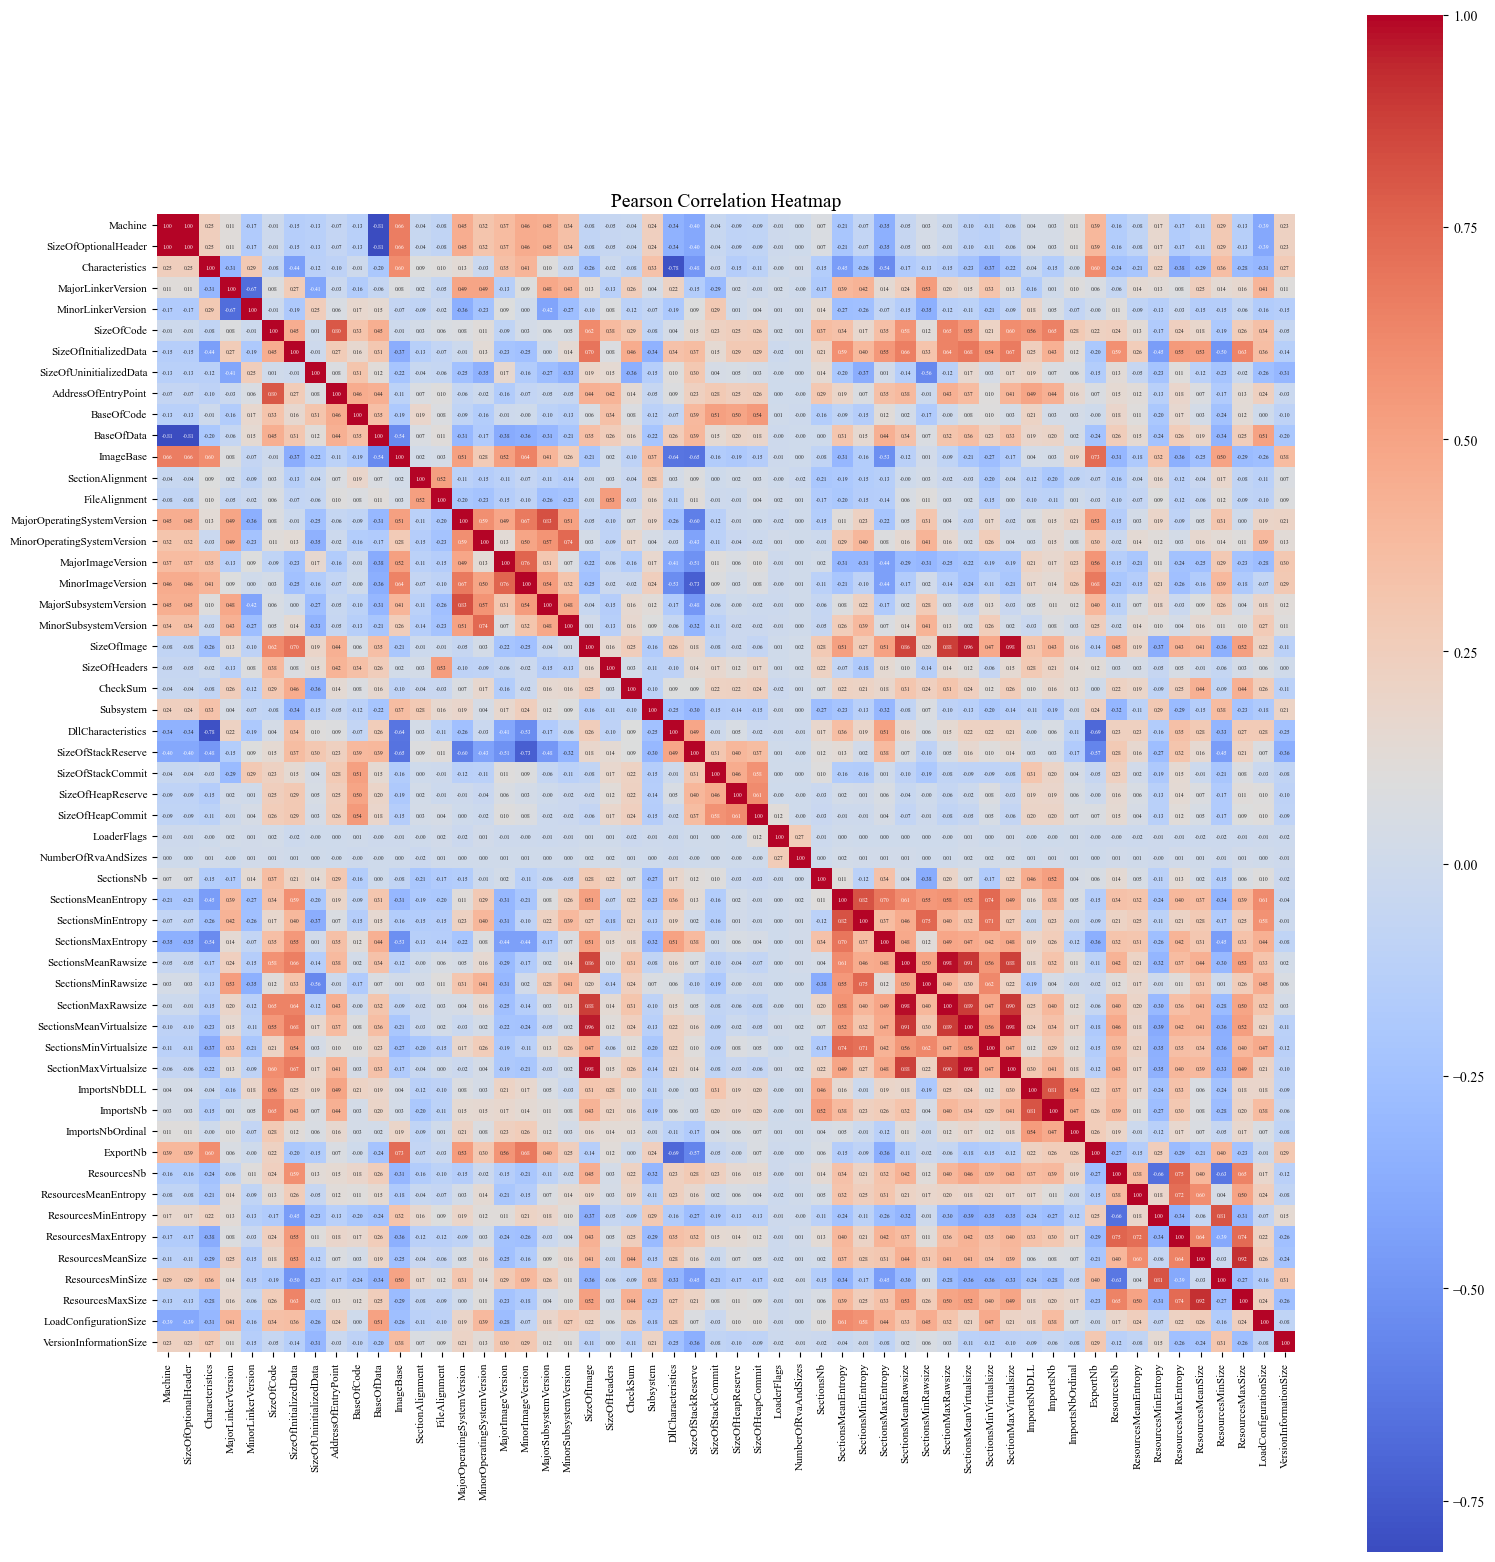

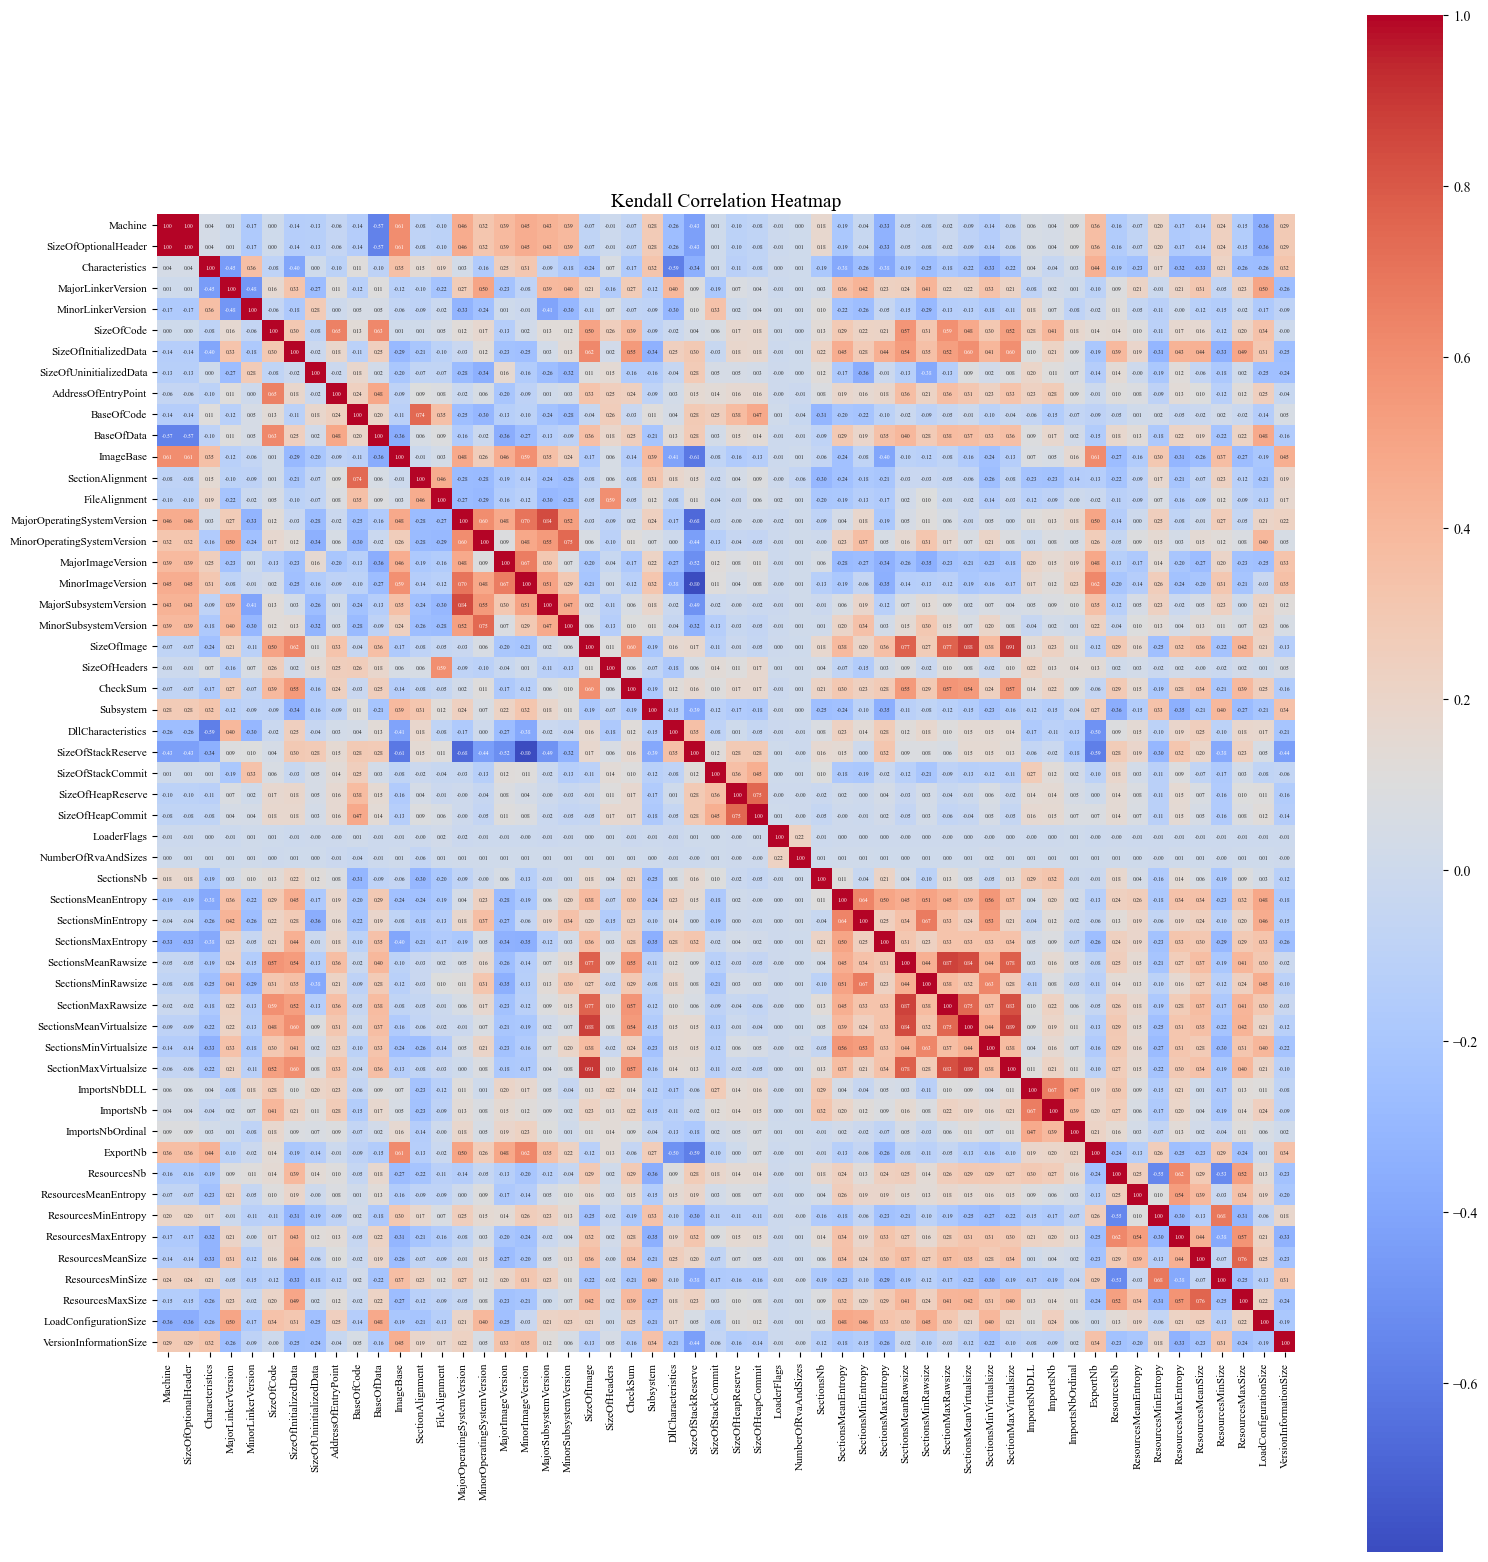

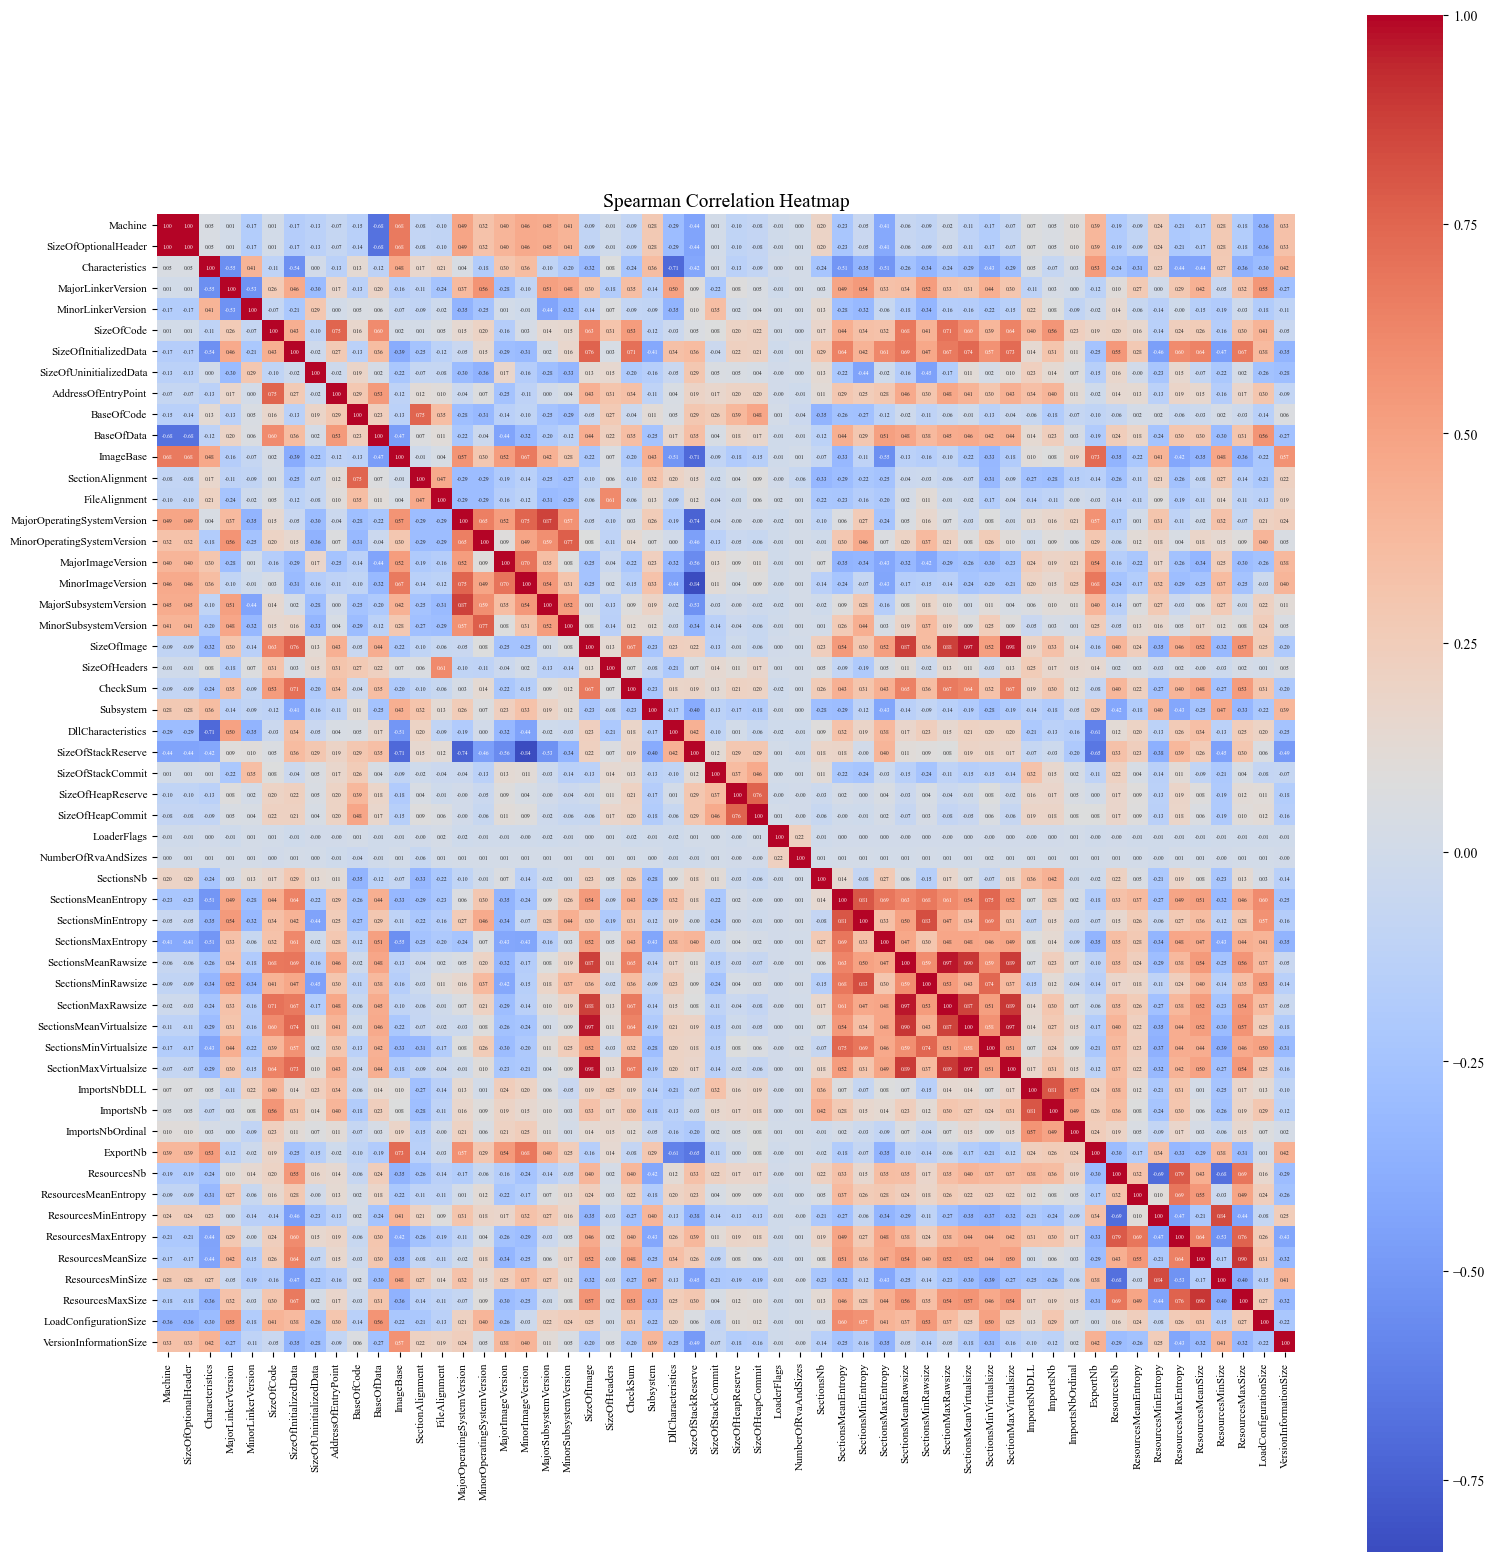

In [78]:
# Dropping non-numerical columns and 'Name' for correlation analysis
df_numeric = transformed_df.drop(columns=['Name', 'md5', 'legitimate'])

# Calculate correlation matrices for Pearson, Kendall, and Spearman
pearson_corr = df_numeric.corr(method='pearson')
kendall_corr = df_numeric.corr(method='kendall')
spearman_corr = df_numeric.corr(method='spearman')

# Plot heatmaps for each correlation matrix
def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(16, 16))  # Increase the figure size
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                annot_kws={"size": 4}, cbar=True, square=True,
                xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
    
    plt.xticks(rotation=90, fontsize=8)  # Rotate X-axis labels for better readability
    plt.yticks(fontsize=8)  # Set font size for Y-axis labels
    plt.title(f'{title} Correlation Heatmap', fontsize=14)
    plt.tight_layout()  # Ensure layout fits well
    plt.show()

# Plotting heatmaps
plot_heatmap(pearson_corr, 'Pearson')
plot_heatmap(kendall_corr, 'Kendall')
plot_heatmap(spearman_corr, 'Spearman')


Finding highly correlated features using threshhold value 0.8

In [79]:
def get_high_corr_pairs(corr_matrix, threshold):
  mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)  # Ignore diagonal and upper triangle
  high_corr = corr_matrix.where(mask).stack().reset_index()
  high_corr.columns = ['Feature1', 'Feature2', 'Correlation']
  return high_corr[high_corr['Correlation'].abs() >= threshold]


# Find highly correlated feature pairs in each correlation matrix
pearson_high_corr = get_high_corr_pairs(pearson_corr, threshold = 0.8)
kendall_high_corr = get_high_corr_pairs(kendall_corr, threshold = 0.8)
spearman_high_corr = get_high_corr_pairs(spearman_corr, threshold = 0.8)

pearson_pairs = set([tuple(sorted([row['Feature1'], row['Feature2']])) for _, row in pearson_high_corr.iterrows()])
kendall_pairs = set([tuple(sorted([row['Feature1'], row['Feature2']])) for _, row in kendall_high_corr.iterrows()])
spearman_pairs = set([tuple(sorted([row['Feature1'], row['Feature2']])) for _, row in spearman_high_corr.iterrows()])
# Find common pairs across all three methods
common_pairs_first = pearson_pairs & kendall_pairs & spearman_pairs

common_pairs_first

{('Machine', 'SizeOfOptionalHeader'),
 ('MajorOperatingSystemVersion', 'MajorSubsystemVersion'),
 ('SectionMaxRawsize', 'SectionMaxVirtualsize'),
 ('SectionMaxRawsize', 'SectionsMeanRawsize'),
 ('SectionMaxVirtualsize', 'SectionsMeanVirtualsize'),
 ('SectionMaxVirtualsize', 'SizeOfImage'),
 ('SectionsMeanRawsize', 'SectionsMeanVirtualsize'),
 ('SectionsMeanVirtualsize', 'SizeOfImage')}

Finding highly correlated features using thresh hold value 0.9

In [80]:
def get_high_corr_pairs(corr_matrix, threshold):
  mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)  # Ignore diagonal and upper triangle
  high_corr = corr_matrix.where(mask).stack().reset_index()
  high_corr.columns = ['Feature1', 'Feature2', 'Correlation']
  return high_corr[high_corr['Correlation'].abs() >= threshold]


# Find highly correlated feature pairs in each correlation matrix
pearson_high_corr = get_high_corr_pairs(pearson_corr, threshold = 0.8)
kendall_high_corr = get_high_corr_pairs(kendall_corr, threshold = 0.8)
spearman_high_corr = get_high_corr_pairs(spearman_corr, threshold = 0.8)

pearson_pairs = set([tuple(sorted([row['Feature1'], row['Feature2']])) for _, row in pearson_high_corr.iterrows()])
kendall_pairs = set([tuple(sorted([row['Feature1'], row['Feature2']])) for _, row in kendall_high_corr.iterrows()])
spearman_pairs = set([tuple(sorted([row['Feature1'], row['Feature2']])) for _, row in spearman_high_corr.iterrows()])
# Find common pairs across all three methods
common_pairs_second = pearson_pairs & kendall_pairs & spearman_pairs

common_pairs_second


{('Machine', 'SizeOfOptionalHeader'),
 ('MajorOperatingSystemVersion', 'MajorSubsystemVersion'),
 ('SectionMaxRawsize', 'SectionMaxVirtualsize'),
 ('SectionMaxRawsize', 'SectionsMeanRawsize'),
 ('SectionMaxVirtualsize', 'SectionsMeanVirtualsize'),
 ('SectionMaxVirtualsize', 'SizeOfImage'),
 ('SectionsMeanRawsize', 'SectionsMeanVirtualsize'),
 ('SectionsMeanVirtualsize', 'SizeOfImage')}

Next, we determine which attribute to select from the two based on variance and choose the one with lower variance

In [81]:
def compare_variances(df, pairs):
    for pair in pairs:
        var1 = df[pair[0]].var()
        var2 = df[pair[1]].var()
        print(f"Variance of {pair[0]}: {var1}")
        print(f"Variance of {pair[1]}: {var2}")
        if var1 > var2:
            print(f"{pair[1]} has lower variance than {pair[0]}\n")
        elif var1 < var2:
            print(f"{pair[0]} has lower variance than {pair[1]}\n")
        else:
            print(f"{pair[0]} and {pair[1]} have the same variance\n")

# Call the function to compare variances for the given pairs
compare_variances(transformed_df, common_pairs_first)

Variance of MajorOperatingSystemVersion: 1.0000120999455504
Variance of MajorSubsystemVersion: 1.00001209994555
MajorSubsystemVersion has lower variance than MajorOperatingSystemVersion

Variance of Machine: 1.0000120999455502
Variance of SizeOfOptionalHeader: 1.912778840460675e-33
SizeOfOptionalHeader has lower variance than Machine

Variance of SectionMaxVirtualsize: 1.0000120999455506
Variance of SectionsMeanVirtualsize: 1.0000120999455502
SectionsMeanVirtualsize has lower variance than SectionMaxVirtualsize

Variance of SectionsMeanVirtualsize: 1.0000120999455502
Variance of SizeOfImage: 1.0000120999455502
SectionsMeanVirtualsize and SizeOfImage have the same variance

Variance of SectionMaxRawsize: 1.0000120999455504
Variance of SectionsMeanRawsize: 1.0000120999455502
SectionsMeanRawsize has lower variance than SectionMaxRawsize

Variance of SectionMaxRawsize: 1.0000120999455504
Variance of SectionMaxVirtualsize: 1.0000120999455506
SectionMaxRawsize has lower variance than Section

In order to find Feature importance, we will find Mutual Information
We drop the columns with categorical values and find mutual information in association with legitimate.

In [82]:
mi_df = df.copy()
mi_df = mi_df.drop(columns=['Name', 'md5'])

mi_scores = mutual_info_classif(mi_df.drop('legitimate', axis=1), mi_df['legitimate'])
mi_scores = pd.Series(mi_scores, index=mi_df.drop('legitimate', axis=1).columns)
mi_df = pd.DataFrame({'Mutual Information': mi_scores})

We visualize the mutual information values for the various attributes

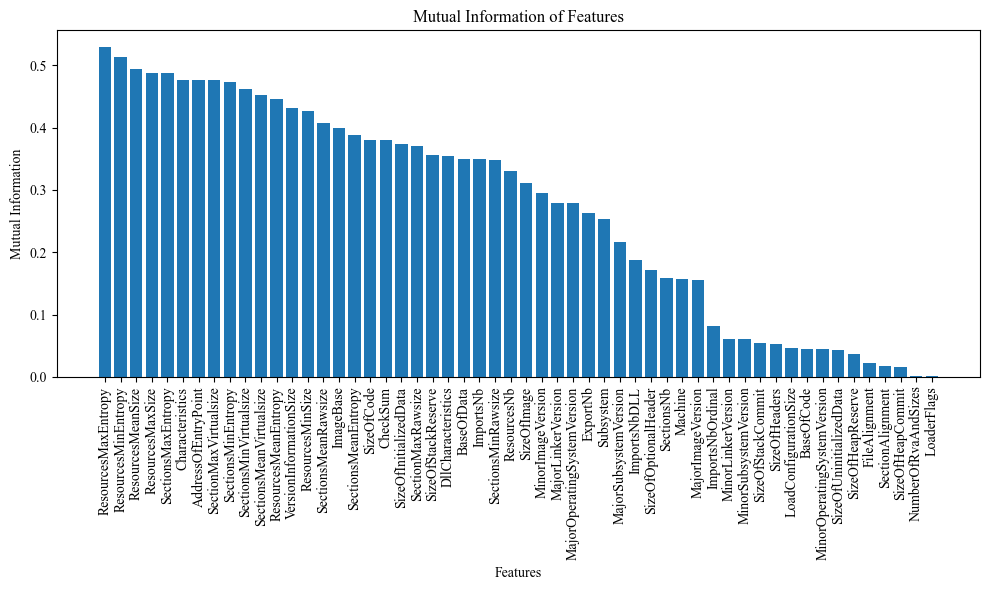

In [83]:
# Sort mutual information values in descending order
sorted_mi = mi_df.sort_values(by='Mutual Information', ascending=False)

# Plot the MI values as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_mi.index, sorted_mi['Mutual Information'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.title("Mutual Information of Features")
plt.xlabel("Features")
plt.ylabel("Mutual Information")

# Show the plot with adjusted layout
plt.tight_layout()
plt.show()


We will set the threshhold value for MI at 0.25 and select the attributes for the model

In [84]:
# Get the list of attributes with mutual information less than 0.25
low_mi_attributes = mi_df[mi_df['Mutual Information'] < 0.25].index.tolist()
low_mi_attributes

['Machine',
 'SizeOfOptionalHeader',
 'MinorLinkerVersion',
 'SizeOfUninitializedData',
 'BaseOfCode',
 'SectionAlignment',
 'FileAlignment',
 'MinorOperatingSystemVersion',
 'MajorImageVersion',
 'MajorSubsystemVersion',
 'MinorSubsystemVersion',
 'SizeOfHeaders',
 'SizeOfStackCommit',
 'SizeOfHeapReserve',
 'SizeOfHeapCommit',
 'LoaderFlags',
 'NumberOfRvaAndSizes',
 'SectionsNb',
 'ImportsNbDLL',
 'ImportsNbOrdinal',
 'LoadConfigurationSize']

In [85]:
# Get the list of attributes with mutual information less than 0.1
low_mi_attributes = mi_df[mi_df['Mutual Information'] < 0.1].index.tolist()
low_mi_attributes

['MinorLinkerVersion',
 'SizeOfUninitializedData',
 'BaseOfCode',
 'SectionAlignment',
 'FileAlignment',
 'MinorOperatingSystemVersion',
 'MinorSubsystemVersion',
 'SizeOfHeaders',
 'SizeOfStackCommit',
 'SizeOfHeapReserve',
 'SizeOfHeapCommit',
 'LoaderFlags',
 'NumberOfRvaAndSizes',
 'ImportsNbOrdinal',
 'LoadConfigurationSize']

In [86]:
# Get the list of attributes with mutual information less than 0.01
low_mi_attributes = mi_df[mi_df['Mutual Information'] < 0.01].index.tolist()
low_mi_attributes

['LoaderFlags', 'NumberOfRvaAndSizes']

In [87]:
required_columns = mi_df[mi_df['Mutual Information'] > 0.25].index.tolist()

feature_reduced_df = pd.DataFrame()
feature_reduced_df[required_columns] = transformed_df[required_columns]
feature_reduced_df['legitimate'] = transformed_df['legitimate']
feature_reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82646 entries, 0 to 82645
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Characteristics              82646 non-null  float64
 1   MajorLinkerVersion           82646 non-null  float64
 2   SizeOfCode                   82646 non-null  float64
 3   SizeOfInitializedData        82646 non-null  float64
 4   AddressOfEntryPoint          82646 non-null  float64
 5   BaseOfData                   82646 non-null  float64
 6   ImageBase                    82646 non-null  float64
 7   MajorOperatingSystemVersion  82646 non-null  float64
 8   MinorImageVersion            82646 non-null  float64
 9   SizeOfImage                  82646 non-null  float64
 10  CheckSum                     82646 non-null  float64
 11  Subsystem                    82646 non-null  float64
 12  DllCharacteristics           82646 non-null  float64
 13  SizeOfStackReser

# Unsupervised Learning Algorithms

Extracting the features and labels to run unsupervised models

In [88]:
# Extract features and labels
X = feature_reduced_df.drop(columns=['legitimate'])
y = feature_reduced_df['legitimate']

#Array to store the evaluation result of each of these models
results_dict = {}

Method to visualize clusters

In [89]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# Function to visualize clusters
def visualize_clusters(model_name, labels, X_reduced, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(f'Clusters for {model_name}')
    plt.colorbar()
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

Method to evaluate the clustering methods

In [90]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
 
def evaluate_clustering(model_name, labels, X, y):
    silhouette_avg = silhouette_score(X, labels)
    ch_score = calinski_harabasz_score(X, labels)
    homogeneity = homogeneity_score(y, labels)
    completeness = completeness_score(y, labels)
    v_measure = v_measure_score(y, labels)
    # Store the metrics in a nested dictionary
    return {
        'Silhouette Score': silhouette_avg,
        'Calinski-Harabasz Score': ch_score,
        'Homogeneity': homogeneity,
        'Completeness': completeness,
        'V-Measure': v_measure
    }

# 1. K Means Clustering


   Predicted Cluster  Actual Label
0                  0             0
1                  1             1
2                  0             1
3                  1             0
4                  1             1


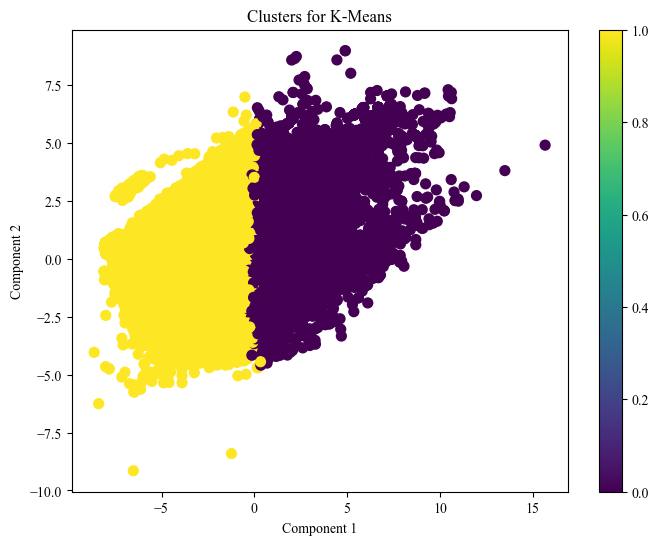

In [91]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Predict the clusters
clusters = kmeans.labels_

# Compare clustering results to actual labels
cluster_df = pd.DataFrame({'Predicted Cluster': clusters, 'Actual Label': y})
print(cluster_df.head())

# Evaluating K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
results_dict["K-Means"] = evaluate_clustering("K-Means", kmeans.labels_, X, y)

# Visualizing K-Means Clustering
kmeans_labels = kmeans.labels_
visualize_clusters("K-Means", kmeans_labels, X_pca, y)


# 2. DBSCAN (Density-Based Clustering)

   Predicted Cluster  Actual Label
0                  0             0
1                 -1             1
2                  1             1
3                  2             0
4                 -1             1


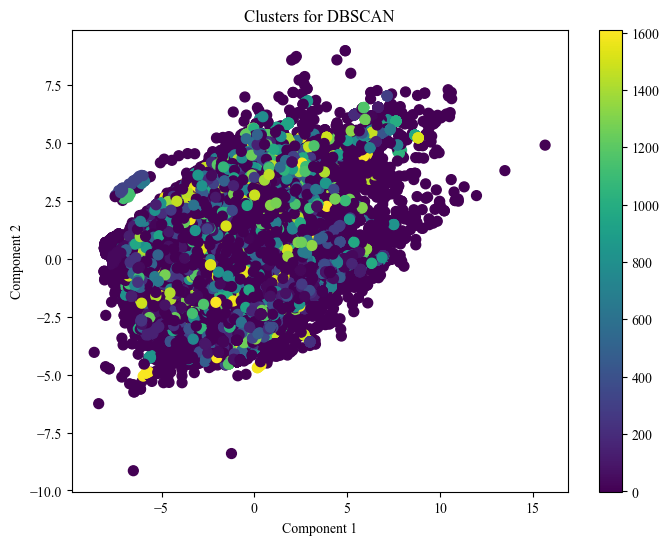

In [92]:
from sklearn.cluster import DBSCAN

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

# Predict the clusters
db_clusters = dbscan.labels_

# Compare DBSCAN clusters to actual labels
dbscan_cluster_df = pd.DataFrame({'Predicted Cluster': db_clusters, 'Actual Label': y})
print(dbscan_cluster_df.head())

# Evaluating DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_clusters = dbscan.fit_predict(X)
results_dict["DBSCAN"] = evaluate_clustering("DBSCAN", db_clusters, X, y)

# Visualizing DBSCAN Clustering
visualize_clusters("DBSCAN", db_clusters, X_pca, y)

# 3. Gaussian Mixture Model (GMM):

   Predicted Cluster  Actual Label
0                  0             0
1                  1             1
2                  1             1
3                  0             0
4                  1             1


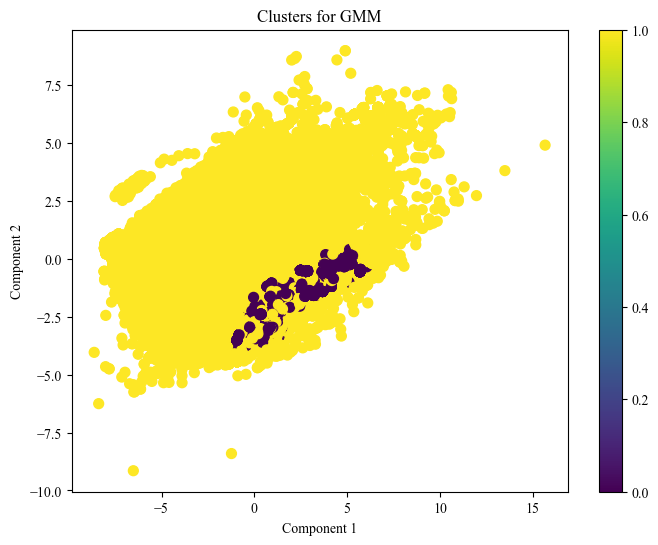

In [93]:
from sklearn.mixture import GaussianMixture

# GMM Clustering
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X)

# Predict clusters
gmm_clusters = gmm.predict(X)

# Compare GMM clusters to actual labels
gmm_cluster_df = pd.DataFrame({'Predicted Cluster': gmm_clusters, 'Actual Label': y})
print(gmm_cluster_df.head())

# Evaluating Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X)
gmm_clusters = gmm.predict(X)
results_dict["GMM"] = evaluate_clustering("GMM", gmm_clusters, X, y)

# Visualizing GMM Clustering
visualize_clusters("GMM", gmm_clusters, X_pca, y)



# 4. Hierarchical Clustering

   Predicted Cluster  Actual Label
0               1153             0
1                 -1             1
2                 -1             1
3                573             0
4               1883             1


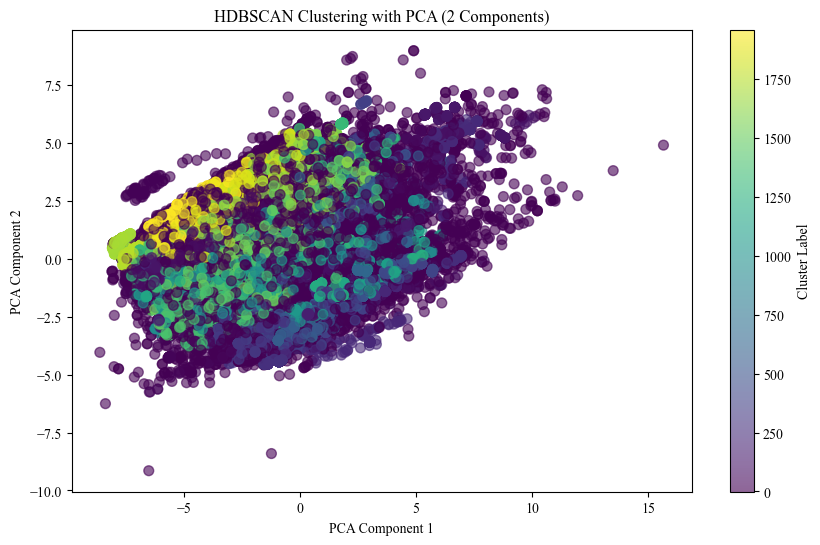

In [94]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import hdbscan
import pandas as pd
import matplotlib.pyplot as plt

# Extract features and labels
X = feature_reduced_df.drop(columns=['legitimate'])
y = feature_reduced_df['legitimate']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X)

# HDBSCAN Clustering
hdbscan_clustering = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5)  # Adjust parameters as needed
hdbscan_clusters = hdbscan_clustering.fit_predict(X)

# Compare HDBSCAN clusters to actual labels
hdbscan_cluster_df = pd.DataFrame({'Predicted Cluster': hdbscan_clusters, 'Actual Label': y})
print(hdbscan_cluster_df.head())

# Evaluating HDBSCAN Clustering
results_dict["HDBSCAN Clustering"] = evaluate_clustering("HDBSCAN Clustering", hdbscan_clusters, X, y)

# Visualizing PCA-reduced data with HDBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hdbscan_clusters, cmap='viridis', s=50, alpha=0.6)
plt.colorbar(label='Cluster Label')
plt.title('HDBSCAN Clustering with PCA (2 Components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


# 5. Autoencoder (for Dimensionality Reduction):

Epoch 1/50
323/323 [==============================] - 0s 394us/step - loss: 0.9497
Epoch 2/50
323/323 [==============================] - 0s 382us/step - loss: 0.7453
Epoch 3/50
323/323 [==============================] - 0s 380us/step - loss: 0.6952
Epoch 4/50
323/323 [==============================] - 0s 380us/step - loss: 0.6719
Epoch 5/50
323/323 [==============================] - 0s 380us/step - loss: 0.6600
Epoch 6/50
323/323 [==============================] - 0s 382us/step - loss: 0.6532
Epoch 7/50
323/323 [==============================] - 0s 379us/step - loss: 0.6485
Epoch 8/50
323/323 [==============================] - 0s 384us/step - loss: 0.6451
Epoch 9/50
323/323 [==============================] - 0s 388us/step - loss: 0.6424
Epoch 10/50
323/323 [==============================] - 0s 500us/step - loss: 0.6401
Epoch 11/50
323/323 [==============================] - 0s 388us/step - loss: 0.6380
Epoch 12/50
323/323 [==============================] - 0s 387us/step - loss: 0.6363
E

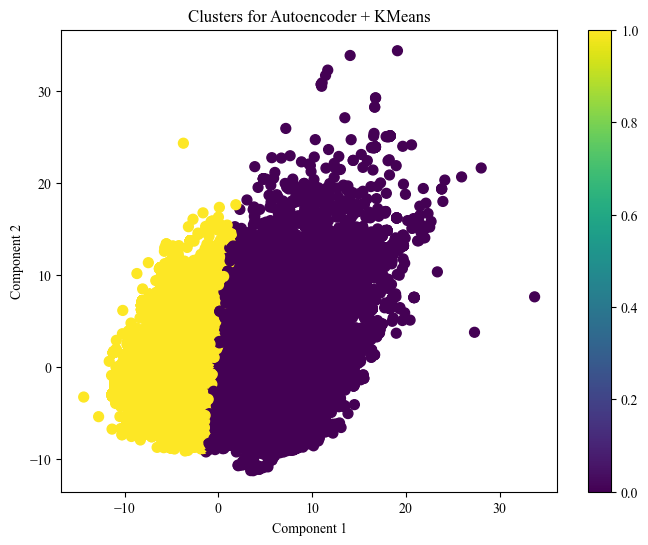

In [95]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.cluster import KMeans

# Build Autoencoder
input_dim = X.shape[1]
encoding_dim = 10  # Number of dimensions to reduce to

# Encoder
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X, X, epochs=50, batch_size=256, shuffle=True)

# Get the encoded (dimensionality-reduced) data
encoder = models.Model(input_layer, encoded)
X_encoded = encoder.predict(X)

# Now, you can use X_encoded to apply a clustering algorithm or directly use it for classification
print(X_encoded.shape)



# Evaluating Autoencoder (for dimensionality reduction, then use KMeans for clustering)
# Build Autoencoder
input_dim = X.shape[1]
encoding_dim = 10  # Number of dimensions to reduce to

# Encoder
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X, X, epochs=50, batch_size=256, shuffle=True)

# Get the encoded (dimensionality-reduced) data
encoder = models.Model(input_layer, encoded)
X_encoded = encoder.predict(X)

# Apply K-Means to the encoded data
kmeans_encoded = KMeans(n_clusters=2, random_state=42)
kmeans_encoded.fit(X_encoded)
evaluate_clustering("Autoencoder + KMeans", kmeans_encoded.labels_, X_encoded, y)
results_dict["Autoencoder + K Means"] = evaluate_clustering("Autoencoder + KMeans", kmeans_encoded.labels_, X_encoded, y)

# Visualizing Autoencoder + KMeans
# Apply PCA on encoded data
X_encoded_pca = pca.fit_transform(X_encoded)
kmeans_encoded_labels = kmeans_encoded.labels_
visualize_clusters("Autoencoder + KMeans", kmeans_encoded_labels, X_encoded_pca, y)

Visualizing and comparing the performance of different models

/var/folders/43/6fvj434j2qjfvdnjgd1n535r0000gn/T/ipykernel_14500/4075463046.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df.reset_index(), x='index', y=metrics[0], ax=axes[0, 0], palette=palette_1, width=0.4)
/var/folders/43/6fvj434j2qjfvdnjgd1n535r0000gn/T/ipykernel_14500/4075463046.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df.reset_index(), x='index', y=metrics[1], ax=axes[0, 1], palette=palette_2, width=0.4)
/var/folders/43/6fvj434j2qjfvdnjgd1n535r0000gn/T/ipykernel_14500/4075463046.py:37: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(data=melted_df, x='index', y='Score', hue='Metr

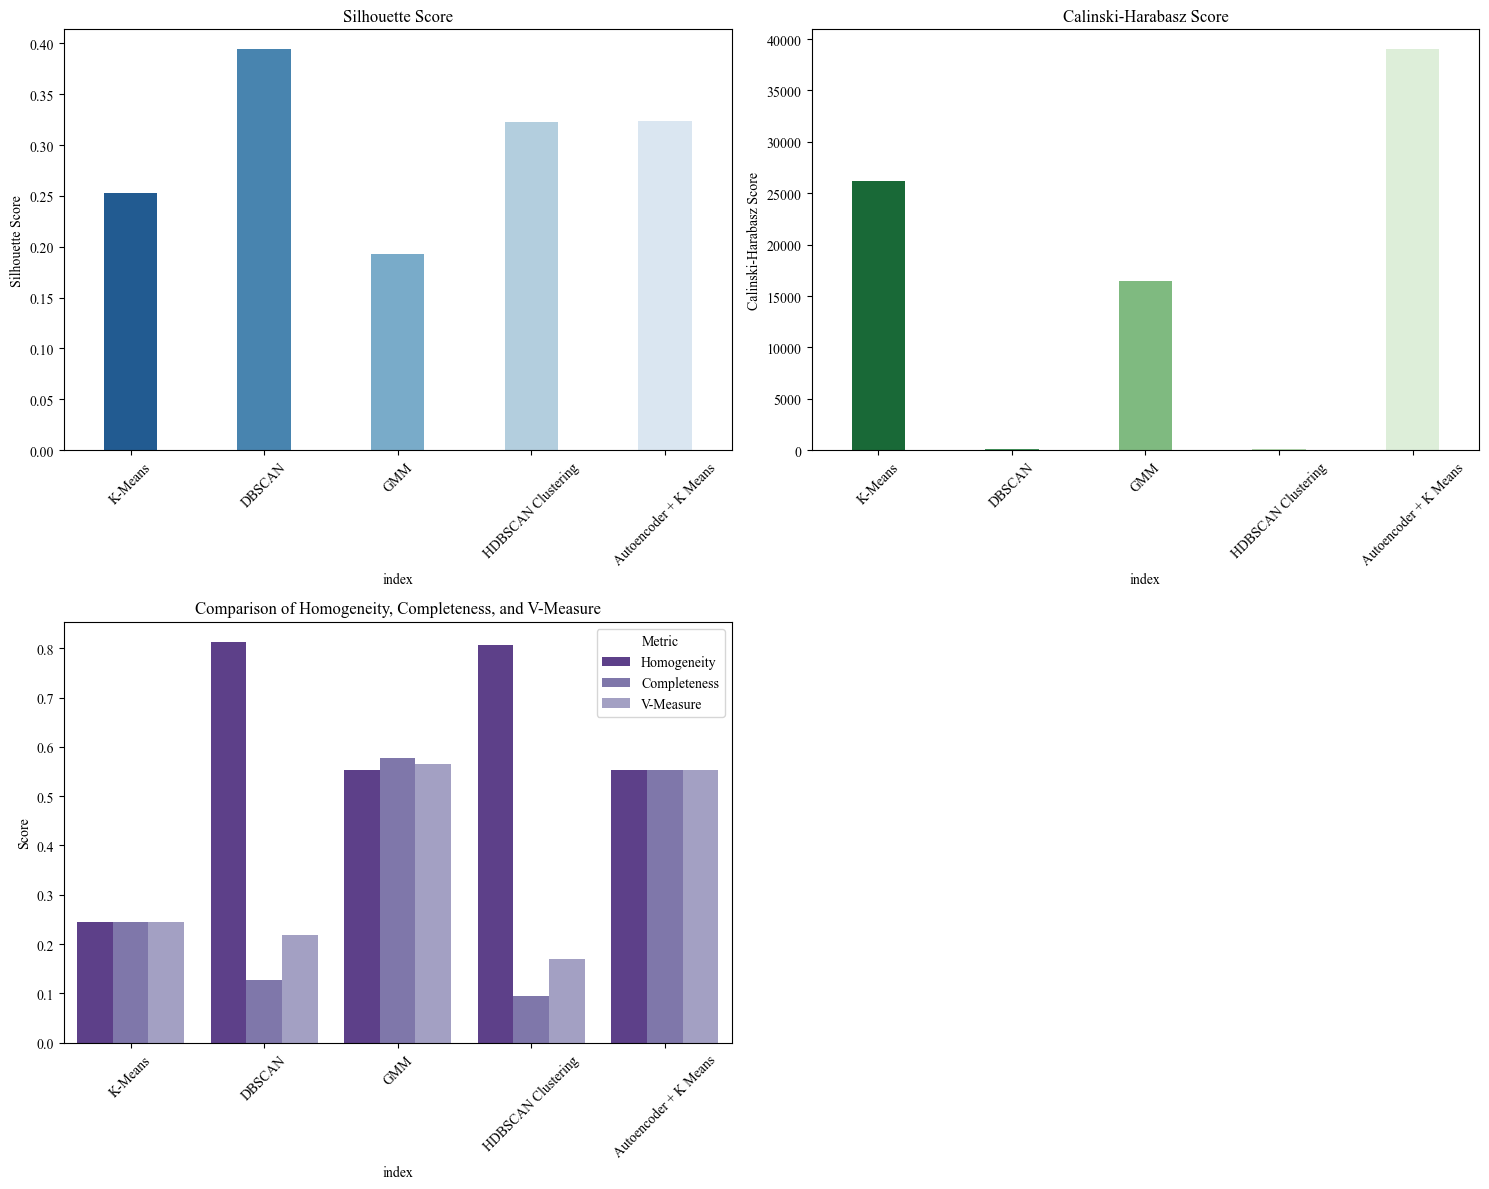

,Silhouette Score,Calinski-Harabasz Score,Homogeneity,Completeness,V-Measure
K-Means,0.252765,26180.676728,0.244775,0.245713,0.245243
DBSCAN,0.394153,130.034945,0.812995,0.126379,0.218753
GMM,0.193111,16461.336370,0.553568,0.577845,0.565446
HDBSCAN Clustering,0.323115,123.915077,0.806326,0.095171,0.170248
Autoencoder + K Means,0.324121,38996.457273,0.553025,0.554106,0.553565


In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert results_dict to a DataFrame for easy plotting
results_df = pd.DataFrame.from_dict(results_dict, orient='index')

# Print the table of all metrics including Silhouette Score and Calinski-Harabasz Score
display_table = results_df[['Silhouette Score', 'Calinski-Harabasz Score'] + display_metrics]
# print(display_table)  # Display the table in console to verify

# Plot the other metrics (Silhouette Score, Calinski-Harabasz Score) + the new bar plot for Homogeneity, Completeness, and V-Measure
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # Adjust the figure to have 2 rows and 2 columns

# Different color palettes for each plot
palette_1 = sns.color_palette("Blues_r", len(results_df))
palette_2 = sns.color_palette("Greens_r", len(results_df))
palette_3 = sns.color_palette("Purples_r", len(results_df))  # Palette for the new metrics plot

# Metrics to plot
metrics = ['Silhouette Score', 'Calinski-Harabasz Score']

# First plot for Silhouette Score with reduced bar width
sns.barplot(data=results_df.reset_index(), x='index', y=metrics[0], ax=axes[0, 0], palette=palette_1, width=0.4)
axes[0, 0].set_title(metrics[0], fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

# Second plot for Calinski-Harabasz Score with reduced bar width
sns.barplot(data=results_df.reset_index(), x='index', y=metrics[1], ax=axes[0, 1], palette=palette_2, width=0.4)
axes[0, 1].set_title(metrics[1], fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)

# Create a melted version of the DataFrame for Homogeneity, Completeness, and V-Measure
melted_df = results_df.reset_index().melt(id_vars='index', value_vars=display_metrics, var_name='Metric', value_name='Score')

# Plot the Homogeneity, Completeness, and V-Measure metrics in the third plot
sns.barplot(data=melted_df, x='index', y='Score', hue='Metric', ax=axes[1, 0], palette=palette_3)
axes[1, 0].set_title('Comparison of Homogeneity, Completeness, and V-Measure', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# Hide the unused subplot (axes[1, 1]) since we only need three plots
axes[1, 1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# display the table inline in a Jupyter environment
from IPython.display import display
display(display_table)
